# <font color='red'>Projeto</font>
# <font color='blue' >Prevendo o Nível de Satisfação dos Clientes do Santander</font>

### Definindo o Problema de Negócio:
Baseado em dados históricos, iremos prever se um cliente está satisfeito ou insatisfeito com sua experiência bancária

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')

In [3]:
# Visualizando as primeiras linhas do dataframe
train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
# Nome das colunas
train.columns.values

array(['ID', 'var3', 'var15', 'imp_ent_var16_ult1',
       'imp_op_var39_comer_ult1', 'imp_op_var39_comer_ult3',
       'imp_op_var40_comer_ult1', 'imp_op_var40_comer_ult3',
       'imp_op_var40_efect_ult1', 'imp_op_var40_efect_ult3',
       'imp_op_var40_ult1', 'imp_op_var41_comer_ult1',
       'imp_op_var41_comer_ult3', 'imp_op_var41_efect_ult1',
       'imp_op_var41_efect_ult3', 'imp_op_var41_ult1',
       'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3',
       'imp_op_var39_ult1', 'imp_sal_var16_ult1', 'ind_var1_0',
       'ind_var1', 'ind_var2_0', 'ind_var2', 'ind_var5_0', 'ind_var5',
       'ind_var6_0', 'ind_var6', 'ind_var8_0', 'ind_var8', 'ind_var12_0',
       'ind_var12', 'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto',
       'ind_var13_largo_0', 'ind_var13_largo', 'ind_var13_medio_0',
       'ind_var13_medio', 'ind_var13', 'ind_var14_0', 'ind_var14',
       'ind_var17_0', 'ind_var17', 'ind_var18_0', 'ind_var18',
       'ind_var19', 'ind_var20_0', 'ind_var20', 'in

In [5]:
# Visualizando os tipos de dados
train.dtypes

ID                           int64
var3                         int64
var15                        int64
imp_ent_var16_ult1         float64
imp_op_var39_comer_ult1    float64
                            ...   
saldo_medio_var44_hace3    float64
saldo_medio_var44_ult1     float64
saldo_medio_var44_ult3     float64
var38                      float64
TARGET                       int64
Length: 371, dtype: object

In [6]:
# Temos 111 colunas com valores tipos float, e 260 com tipo inteiro, totalizando 371 colunas
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [7]:
# Quantidade de linhas e colunas
print('O dataframe tem {} linhas e {} colunas'.format((train.shape[0]), train.shape[1]))

O dataframe tem 76020 linhas e 371 colunas


In [8]:
# Resumo estatístico 
train.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [9]:
# Checando se temos valores missing
train.isna().sum().any()

False

### Variável Target

In [10]:
# Proporção de 0's e 1's na variável Target
df = pd.DataFrame(train.TARGET.value_counts())
df['Percentage'] = df['TARGET']/train.shape[0] * 100
df

,TARGET,Percentage
0,73012,96.043147
1,3008,3.956853


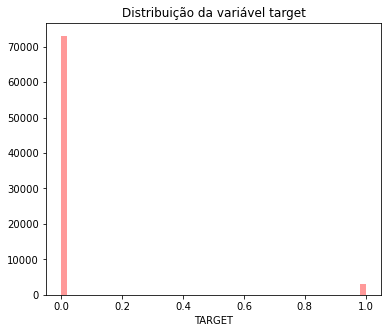

In [11]:
plt.figure(figsize=(6,5))
sns.distplot(a = train.TARGET, kde=False, color='red');
plt.title('Distribuição da variável target');

### Variável Nacionalidade - Var3

In [12]:
# Nacionalidade dos clientes - Var3
train.var3.value_counts()[:10]

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64

In [13]:
# Trocando os valores -999999 (nacionalidades desconhecidas) pelo número que mais apareceu, o 2.
train['var3'] = train['var3'].replace(-999999, 2)
train.loc[train.var3 == -999999].shape

(0, 371)

### Variável produtos bancários - var4

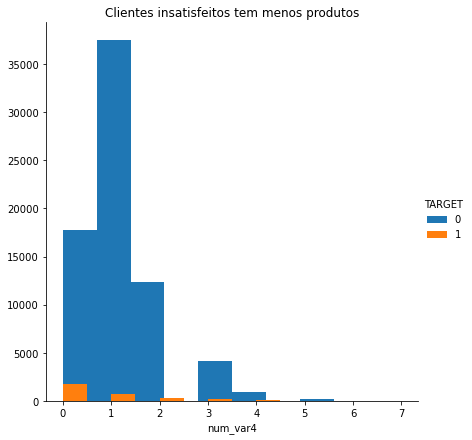

In [14]:
sns.FacetGrid(train, hue="TARGET", height=6) \
   .map(plt.hist, "num_var4") \
   .add_legend()
plt.title('Clientes insatisfeitos tem menos produtos')
plt.show()

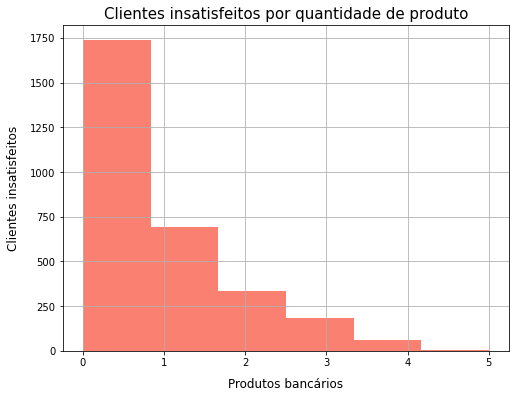

In [15]:
# Quantidade de clientes insatisfeitos por quantidade de produto
plt.figure(figsize=(8,6))
train[train.TARGET==1].num_var4.hist(bins=6, color = 'salmon')
plt.xlabel('Produtos bancários', labelpad=10, fontsize=12)
plt.ylabel('Clientes insatisfeitos', labelpad=10, fontsize=12);
plt.title('Clientes insatisfeitos por quantidade de produto', fontsize=15);

### Variável Hipoteca - var38

In [16]:
# Resumo da variável
train.var38.describe()

count    7.602000e+04
mean     1.172358e+05
std      1.826646e+05
min      5.163750e+03
25%      6.787061e+04
50%      1.064092e+05
75%      1.187563e+05
max      2.203474e+07
Name: var38, dtype: float64

In [17]:
# Hipoteca para os clientes insatisfeitos
train.loc[train['TARGET']==1, 'var38'].describe()

count    3.008000e+03
mean     9.967828e+04
std      1.063098e+05
min      1.113663e+04
25%      5.716094e+04
50%      8.621997e+04
75%      1.173110e+05
max      3.988595e+06
Name: var38, dtype: float64

In [18]:
train.var3.value_counts()[:10]

2     74281
8       138
9       110
3       108
1       105
13       98
7        97
4        86
12       85
6        82
Name: var3, dtype: int64

In [19]:
# Valores mais comuns em var38
train.var38.value_counts()

117310.979016    14868
451931.220000       16
463625.160000       12
288997.440000       11
104563.800000       11
                 ...  
318211.440000        1
73069.260000         1
36425.370000         1
163515.900000        1
159395.520000        1
Name: var38, Length: 57736, dtype: int64

### Variável Idade - var15

In [20]:
train.var15.describe()

count    76020.000000
mean        33.212865
std         12.956486
min          5.000000
25%         23.000000
50%         28.000000
75%         40.000000
max        105.000000
Name: var15, dtype: float64

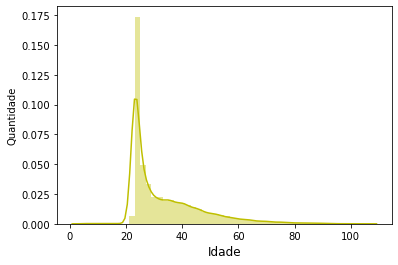

In [21]:
sns.distplot(a= train.var15, color='y');
plt.xlabel('Idade',fontsize=12)
plt.ylabel('Quantidade');

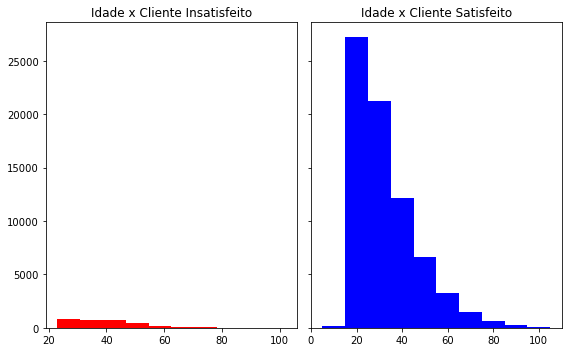

In [22]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True, figsize=(8,5))
axs[0].hist(train.var15[train.TARGET == 1], color = 'r');
axs[1].hist(train.var15[train.TARGET == 0], color = 'b');
axs[0].title.set_text('Idade x Cliente Insatisfeito')
axs[1].title.set_text("Idade x Cliente Satisfeito")

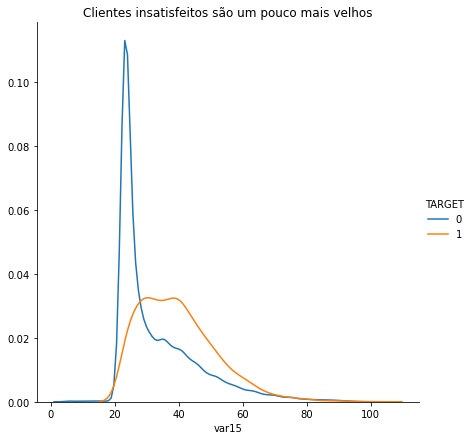

In [23]:
sns.FacetGrid(train, hue="TARGET",height=6) \
    .map(sns.kdeplot, "var15") \
    .add_legend()
plt.title('Clientes insatisfeitos são um pouco mais velhos');

### Variável Saldo - saldo_var30

In [24]:
train.saldo_var30.describe()

count    7.602000e+04
mean     1.367967e+04
std      6.301408e+04
min     -4.942260e+03
25%      0.000000e+00
50%      3.000000e+00
75%      2.359950e+02
max      3.458077e+06
Name: saldo_var30, dtype: float64

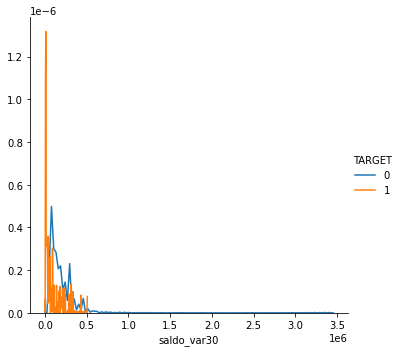

In [25]:
sns.FacetGrid(train, hue='TARGET', height=5) \
    .map(sns.kdeplot, 'saldo_var30') \
    .add_legend()

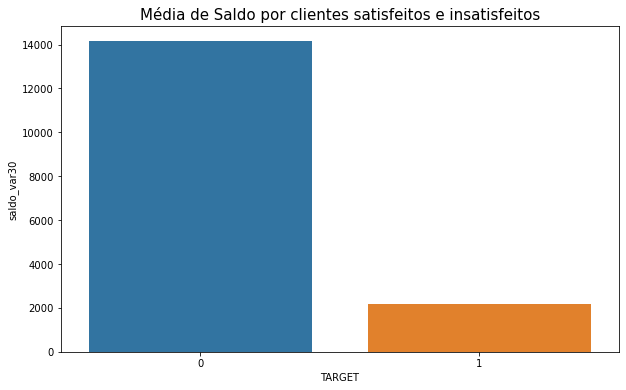

In [26]:
media = train.groupby('TARGET')['saldo_var30'].mean()
media = pd.DataFrame(media)
media = media.reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='TARGET', y='saldo_var30', data=media)
plt.title('Média de Saldo por clientes satisfeitos e insatisfeitos', size=15);

# Correlação entre Saldo e Idade

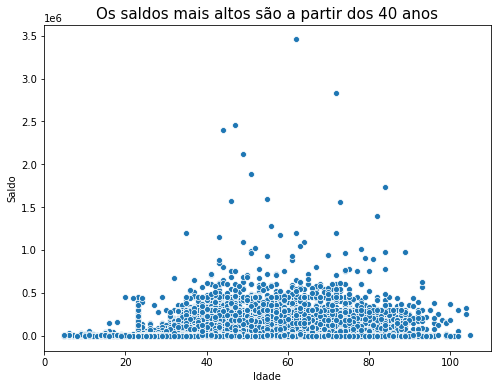

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(train.var15,train.saldo_var30)
plt.title('Os saldos mais altos são a partir dos 40 anos', size=15)
plt.xlabel('Idade')
plt.ylabel('Saldo');

<Figure size 576x432 with 0 Axes>

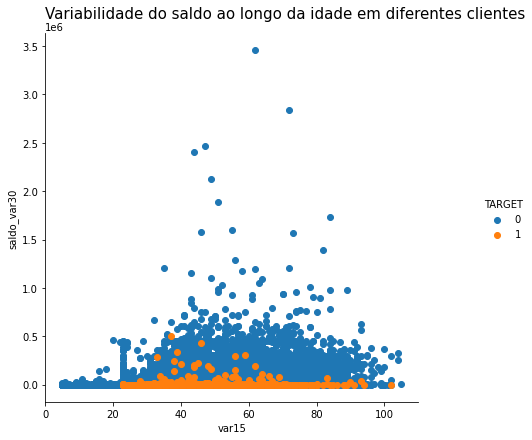

In [28]:
plt.figure(figsize=(8,6))
sns.FacetGrid(data=train, hue='TARGET', height=6) \
    .map(plt.scatter, 'var15', 'saldo_var30') \
    .add_legend();
plt.title('Variabilidade do saldo ao longo da idade em diferentes clientes', size=15, pad=15, loc='left');

# Pré-Processamento

# Feature Selection

In [29]:
# Removendo a coluna ID e a Target e gravando na variável X
X = train.iloc[:,1:-1]

# Gravando a coluna target na variável Y
Y = train.TARGET

# Usando SMOTE para equilibrar as classes

In [30]:
# Importando SMOTE
from imblearn.over_sampling import SMOTE

# Porcetagem dos valores da classe
train.TARGET.value_counts(normalize=True)

0    0.960431
1    0.039569
Name: TARGET, dtype: float64

In [31]:
# Balanceando
x_resampled, y_resampled = SMOTE().fit_resample(X, Y)

# Classe equilibrada - 50/50
pd.value_counts(y_resampled, normalize=True)

1    0.5
0    0.5
Name: TARGET, dtype: float64

### Normalizando as features

In [32]:
from sklearn.preprocessing import MinMaxScaler

# Normalizando
X_scaled = MinMaxScaler(feature_range = (0, 1)).fit_transform(x_resampled)

array([[0.00840336, 0.18      , 0.        , ..., 0.        , 0.        ,
        0.00154526],
       [0.00840336, 0.29      , 0.        , ..., 0.        , 0.        ,
        0.0020025 ],
       [0.00840336, 0.18      , 0.        , ..., 0.        , 0.        ,
        0.00282212],
       ...,
       [0.00840336, 0.23      , 0.        , ..., 0.        , 0.        ,
        0.00509076],
       [0.00840336, 0.43      , 0.        , ..., 0.        , 0.        ,
        0.00380481],
       [0.00840336, 0.32      , 0.        , ..., 0.        , 0.        ,
        0.00477623]])

### Método de Seleção Univariada

Testes estatísticos podem ser usados para selecionar os atributos que possuem forte relacionamento com a variável que estamos tentando prever. O Scikit-learn fornece a função SelectKBest() que pode ser usada com diversos testes estatísticos, para selecionar os atributos. Vamos usar o teste qui-quadrado e selecionar os 4 melhores atributos que podem ser usados como variáveis preditoras.

In [33]:
from sklearn.feature_selection import SelectKBest, chi2

# Seletor de variáveis
selector = SelectKBest(score_func= chi2, k=10).fit(X_scaled, y_resampled)

# Visualizando
features = selector.transform(X_scaled)

# Resultados
print('\nNúmero original de features:', X_scaled.shape[1])
print('\nNúmero reduzido de features:', features.shape[1])
print('\nFeatures (Variáveis Selecionadas): \n\n', features)
print('\nÍndices das variáveis escolhidas:', selector.get_support(indices = True))


Número original de features: 369

Número reduzido de features: 10

Features (Variáveis Selecionadas): 

 [[0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.03030303 0.         0.33333333]
 [1.         0.         0.         ... 1.         0.         1.        ]
 ...
 [1.         0.         0.         ... 0.03030303 0.         1.        ]
 [0.         0.         0.         ... 0.02020202 0.         0.33333333]
 [0.         0.         0.         ... 1.         0.         0.        ]]

Índices das variáveis escolhidas: [ 24  29  30  31  38  63  88 193 259 280]


### Método Ensemble para Seleção de Variáveis

Bagged Decision Trees, como o algoritmo RandomForest (esses são chamados de Métodos Ensemble), podem ser usados para estimar a importância de cada atributo. Esse método retorna um score para cada atributo.

Quanto maior o score, maior a importância do atributo.

In [34]:
from sklearn.ensemble import ExtraTreesClassifier

# Modelo
model = ExtraTreesClassifier()

# Fit
model.fit(X_scaled,y_resampled)

# Results
result = model.feature_importances_

In [35]:
# Imprimindo as 10 variáveis com maiores valores 
ind = np.argpartition(result, -10)[-10:]
print('Variáveis com maiores valores: \n %s \n' % result[ind])
print('Indice das variáveis escolhidas: \n %s \n' % ind)

Variáveis com maiores valores: 
 [0.01541488 0.01605615 0.01562404 0.02569109 0.04077283 0.05675923
 0.12111111 0.06306391 0.07245037 0.14503878] 

Indice das variáveis escolhidas: 
 [326 324 277  90 193  24   1  63 280 368] 



# Redução de Dimensionalidade (Feature Extraction)
# Principal Component Analysis (PCA)

In [36]:
from sklearn.decomposition import PCA

# Selecionando 10 atributos
pca = PCA(n_components=10).fit(X_scaled)

# Sumarizando os componentes
print("Variância: \n %s" % pca.explained_variance_ratio_)
print(pca.components_)

Variância: 
 [0.35228454 0.16062673 0.12647807 0.06619939 0.05525581 0.04402183
 0.03221161 0.02370538 0.01842714 0.01221007]
[[ 3.96275165e-04 -7.75755371e-03  3.93010782e-04 ...  6.88668608e-05
   8.49173747e-05  2.00463519e-04]
 [ 2.55746134e-03  3.49097219e-02  2.70311777e-04 ...  5.10055986e-05
   6.62924726e-05 -6.05689596e-05]
 [ 1.02020771e-03  1.87357248e-03  1.17001889e-04 ...  3.62863841e-05
   5.25844658e-05 -1.75319271e-04]
 ...
 [ 6.66818453e-04  3.71282250e-03  9.24205145e-04 ...  2.00506751e-05
   4.35972982e-05  5.53227246e-04]
 [-1.27493202e-02 -2.17732889e-02  2.75146113e-04 ...  1.77178077e-04
   1.29092204e-04  1.69206204e-05]
 [ 1.73859702e-02 -1.74095117e-03  3.51207039e-04 ...  2.92059062e-04
   4.06951401e-04 -6.00146774e-04]]


# Construção dos modelos de Machine Learning

### Vamos treinar o primeiro modelo com os dados do PCA

In [37]:
# Aplicando PCA nos dados de treino e validação
from sklearn.model_selection import train_test_split

# Dividindo dados de treino e validação
x_treino, x_valid, y_treino, y_valid = train_test_split(X_scaled, y_resampled, test_size = 0.30)

# Aplicando pca ao dados
pca_treino = pca.transform(x_treino)
pca_teste = pca.transform(x_valid)

# Modelo SVM com componentes do PCA

In [38]:
# Imports
from sklearn import svm
from sklearn.metrics import accuracy_score

# Criando o modelo
modelo = svm.SVC()

# Treinando o modelo
modelo.fit(pca_treino, y_treino)

# Prevendo
previsao = modelo.predict(pca_teste)

# Acurácia
round(accuracy_score(y_valid, previsao),4) * 100

79.38

# Modelo SVM com features selecionadas por SelectKBest

In [39]:
# Variáveis preditoras
features = [24 , 29 , 30 , 31 , 38 , 63 , 88 ,193, 259, 280]

# Treinando o modelo
modelo.fit(x_treino[:,features], y_treino)

# Previsão
previsao = modelo.predict(x_valid[:,features])

# Acurácia
round(accuracy_score(y_valid, previsao),4) * 100

78.03999999999999

# Modelo SVM com features selecionadas por ExtraTreesClassifier

In [40]:
# Variáveis preditoras
features = [326, 324, 277,  90, 193,  24,   1,  63, 280, 368]


# Treinando o modelo
modelo.fit(x_treino[:,features], y_treino)

# Previsão
previsao = modelo.predict(x_valid[:,features])

# Acurácia
round(accuracy_score(y_valid, previsao),4) * 100

82.09

# Modelo XGBoost com os componentes do PCA

In [42]:
# Import do modelo
from xgboost import XGBClassifier

# Criando o modelo
modelo = XGBClassifier()

# Treinando o modelo
modelo.fit(pca_treino, y_treino)

# Fazendo previsões
y_pred = modelo.predict(pca_teste)
previsoes = [round(value) for value in y_pred]

# Avaliando as previsões
accuracy = accuracy_score(y_valid, previsoes)
print("Acurácia: %.2f%%" % (accuracy * 100.0))

Acurácia: 87.24%


# Modelo XGBoost com as features selecionadas por SelectKBest

In [43]:
# Features
features = [24,27,29,31,33, 38, 63, 90, 193, 280]

# Criando o modelo
modelo = XGBClassifier()

# Treinando o modelo
modelo.fit(x_treino[:,features], y_treino)

# Fazendo previsões
y_pred = modelo.predict(x_valid[:,features])
previsoes = [round(value) for value in y_pred]

# Avaliando as previsões
accuracy = accuracy_score(y_valid, previsoes)
print("Acurácia: %.2f%%" % (accuracy * 100.0))

Acurácia: 79.12%


# Modelo XGBoost com as features selecionadas por ExtraTreeClassifier

In [44]:
# Features
features = [325, 328, 323, 277, 329, 326, 331, 324, 1, 368]

# Criando o modelo
modelo = XGBClassifier()

# Treinando o modelo
modelo.fit(x_treino[:,features], y_treino)

# Fazendo previsões
y_pred = modelo.predict(x_valid[:,features])
previsoes = [round(value) for value in y_pred]

# Avaliando as previsões
accuracy = accuracy_score(y_valid, previsoes)
print("Acurácia: %.2f%%" % (accuracy * 100.0))

Acurácia: 91.45%


# <font color = 'blue'> Conclusão <font>
Este era um dataset com um grande número de colunas, muitas delas não tinham correlação com a satisfação do cliente, porém é difícil descobrir isso apenas olhando para os dados. Após um extenso trabalho de manipulação e pré-processamento dos dados, reduzimos as colunas em componentes com o PCA, e também testamos nossos modelos com as variáveis mais importantes. Tivemos a melhor acurácia do modelo XGBoost usando as variáveis escolhidas pelo método ExtraTreeClassifier, com uma porcentagem de acerto de 91.45%.

# Obrigado
### Dener Moreira